## Problem 1 (1 pt)

(i): Neither, Horizontal Sobel Filter

(ii): Lowpass Filter

(iii): Highpass Filter

## Problem 2 (1 pt)

Answer: A **Lowpass Filter** was used for **image output 1** because the image is overall just blurred.
Answer: A **Highpass Filter** was used for **image output 2** because the areas with large blank areas have been removed and places of high frequencies/ edges are highlighted.

## Problem 3 (3 pt)


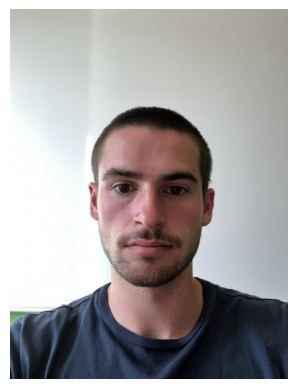

In [1]:
import numpy as np
import matplotlib
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/benbaize/Desktop/CSCI507/IMG_5088.jpeg' 
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [10]:
#Sobil Filter
sobel_vert_filter = np.array([
    [[1, 1, 1], [2, 2, 2], [1, 1, 1]],
    [[0, 0, 0], [0, 0, 0], [0, 0, 0]], #The numbers are repeated three times for the RGB image
    [[-1, -1, -1], [-2, -2, -2], [-1, -1, -1]]
])

#Load Image into Numpy Array
self_image = np.array(image)

In [11]:
#Function for applying filter to image
def filter(image_array,filter):

    filtered_image = np.empty([np.shape(image_array)[0],np.shape(image_array)[1],3]) #Initialize empty new image of same size

    for i in range(1, np.shape(image_array)[0]-1):  
        for j in range(1, np.shape(image_array)[1]-1):
            # 3x3 window applying filter to
            px_grid = np.array([
                [image_array[i-1, j-1], image_array[i, j-1], image_array[i+1, j-1]],
                [image_array[i-1, j],   image_array[i, j],   image_array[i+1, j]],
                [image_array[i-1, j+1], image_array[i, j+1], image_array[i+1, j+1]]
            ])
            #Applying filter to windowed section
            new_px = np.sum(px_grid*filter)
            #Putting filtered Pixel into new image 
            filtered_image[i, j] = new_px
    return filtered_image

In [12]:
#Run the filter through the image
sobel_vert_filtered = filter(self_image,sobel_vert_filter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


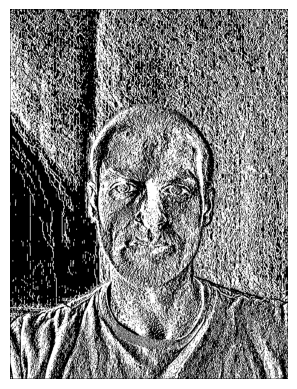

In [13]:
plt.imshow(sobel_vert_filtered)
plt.axis('off')
plt.show()

## Problem 4 (3 pt)

/var/folders/9b/x2ln5s1x0x97knwyr1569h3r0000gn/T/ipykernel_41259/3533230656.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  grayscale_self_image = grayscale_self_image1.resize((200, 400), Image.ANTIALIAS)


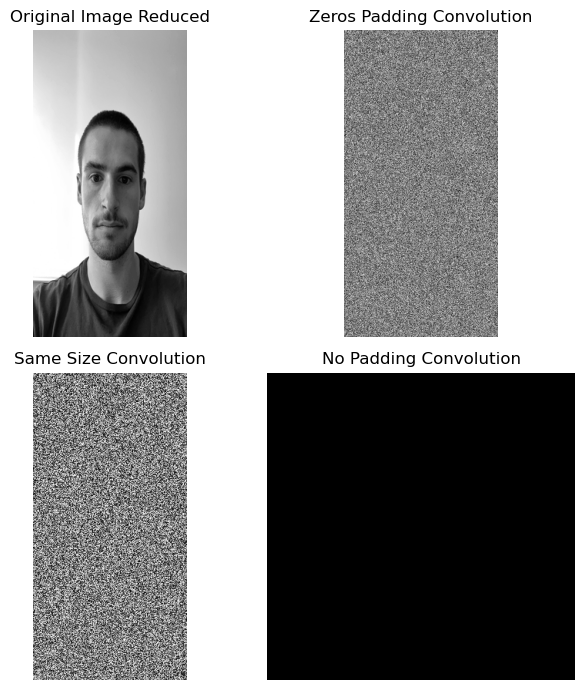

In [15]:
from scipy.signal import convolve2d

#Convolve image with self, zeros padding, same size output, no padding
grayscale_self_image1 = image.convert('L')
grayscale_self_image = grayscale_self_image1.resize((200, 400), Image.ANTIALIAS)
grayscale_self_image = np.array(grayscale_self_image)

zeros_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='full')
samesz_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='same')
nopad_convolve = convolve2d(grayscale_self_image, grayscale_self_image, mode='valid')

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(grayscale_self_image, cmap='gray')
axs[0, 0].set_title('Original Image Reduced')
axs[0, 0].axis('off')  

axs[0, 1].imshow(zeros_convolve, cmap='gray')
axs[0, 1].set_title('Zeros Padding Convolution')
axs[0, 1].axis('off') 

axs[1, 0].imshow(samesz_convolve, cmap='gray')
axs[1, 0].set_title('Same Size Convolution')
axs[1, 0].axis('off')  

axs[1, 1].imshow(nopad_convolve, cmap='gray')
axs[1, 1].set_title('No Padding Convolution')
axs[1, 1].axis('off') 

axs[1, 1].axis('off')  

plt.tight_layout()
plt.show()

## Problem 5 (3 pt)

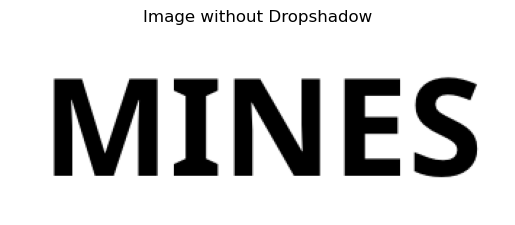

In [19]:
mines_image_path = '/Users/benbaize/Desktop/CSCI507/Mines.jpeg'
mines = Image.open(mines_image_path)
plt.imshow(mines,cmap='gray')
plt.title('Image without Dropshadow')
plt.axis('off')
plt.show()

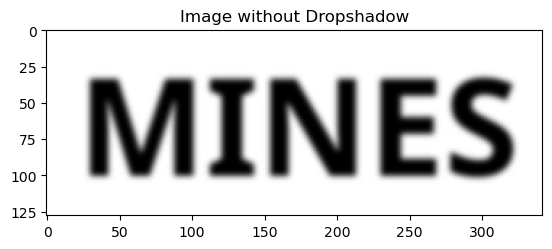

In [30]:
from PIL import ImageFilter
import scipy.ndimage
from skimage.color import rgb2gray

dropshadow = mines.filter(ImageFilter.GaussianBlur) 
plt.imshow(dropshadow,cmap='gray')
plt.title('Image without Dropshadow')
plt.show()

In [31]:
shift_left_down = [-10, 20]  # Shift 10 pixels down and 20 pixels left

#Grayscale reduce dimensions
dropshadow = rgb2gray(dropshadow)

shifted_image = scipy.ndimage.shift(dropshadow, shift=shift_left_down)
plt.imshow(shifted_image,cmap='gray')
plt.title('Dropshadow down and left')
plt.show()

ValueError: the input array must have size 3 along `channel_axis`, got (128, 342, 4)

In [28]:
print(np.shape(dropshadow))

(128, 342, 4)


## Problem 6 (3 pt)

## Problem 7 (3 pt)

## Problem 8 (8 pt)